# Bellevue University 
# DSC540-T302 Data Preparation: Summer 2021
## Yograj Karki 
### Term Project : Milestone 2 <br>
06/24/2021

Original data source: https://www.kaggle.com/sobhanmoosavi/us-accidents <br>
Original csv file is large on size (1.16 GB) with 2906610 rows and 47 columns. For efficiency purpose, I'created another csv file with about 5% randomly sampled data, which would still contain about 145000 rows.

I'll be working on sampled file for a while and then load the entire data when the coding is complete.

In [11]:
# Importing dependencies
import pandas as pd
import numpy as np


In [6]:
# Importing sampled accidents data file usind pandas
df = pd.read_csv("sample_accidents.csv")
df.shape

(145000, 47)

In [5]:
# Let's take a peek how data looks
df.head().T     # Transposed to see all the column names easily

,0,1,2,3,4
ID,A-30,A-44,A-67,A-107,A-123
Severity,2,2,2,2,2
Start_Time,2019-11-25 07:11:55,2016-12-29 07:35:34,2019-04-11 12:20:07,2017-08-22 10:53:29,2019-06-19 17:55:06
End_Time,2019-11-25 08:42:16,2016-12-29 08:05:17,2019-04-11 12:49:16,2017-08-22 11:23:16,2019-06-19 18:24:54
Start_Lat,43.2204,28.6984,31.7597,41.2566,33.7138
Start_Lng,-85.501,-82.4515,-106.484,-95.941,-112.285
End_Lat,43.2204,28.6984,31.7597,41.2566,33.7138
End_Lng,-85.501,-82.4515,-106.484,-95.941,-112.285
Distance(mi),0,0,0,0,0
Description,Accident on 17 Mile Rd at Stout Ave.,Accident on County Hwy-480 Oak Park Blvd at Co...,Accident on Campbell St at Myrtle Ave.,Accident on 19th St Eastbound at Harney St.,Accident on 107th Ave at Happy Valley Pkwy.


In [7]:
# Is there any missing/null values?
df.isnull().sum()

ID                           0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
End_Lat                  14248
End_Lng                  14248
Distance(mi)                 0
Description                  0
Number                   94528
Street                       0
Side                         0
City                         6
County                       0
State                        0
Zipcode                     62
Country                      0
Timezone                   171
Airport_Code               322
Weather_Timestamp         2382
Temperature(F)            3392
Wind_Chill(F)            58776
Humidity(%)               3591
Pressure(in)              2893
Visibility(mi)            3664
Wind_Direction            3202
Wind_Speed(mph)          15287
Precipitation(in)        64851
Weather_Condition         3625
Amenity                      0
Bump                         0
Crossing

<AxesSubplot:>

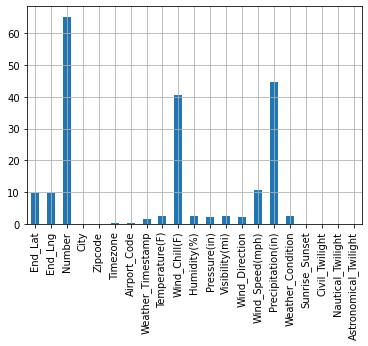

In [29]:
# Let's see the missing values in percentage bar diagram
percentage_of_missing_values=df.isna().sum()/len(df)*100
percentage_of_missing_values[percentage_of_missing_values!=0].plot(kind="bar", grid=True)


Column "Number" has more than 60% of null values, similarly "Wind_Chill(F)" and "Precipitation(in)"  has more than 40% of null values. <br>
Instead of filling them, it seems better to drop those columns since those columns are not necessary for our analyses.
Also, I'm going to remove other unnecessary columns.

In [31]:
# Dropping unnecessary columns
df.drop(["Number"],axis=1,inplace=True) 
df.drop(["Precipitation(in)"],axis=1,inplace=True) 
df.drop(["Wind_Chill(F)"],axis=1,inplace=True)

Also, column such as Country, End_Lat, Eng_Lng, Twilight information are not really useful for us.

In [32]:
# Dropping unnecessary columns
çdf.drop(["End_Lng"],axis=1,inplace=True) 
df.drop(["Airport_Code"],axis=1,inplace=True) 
df.drop(["Zipcode"],axis=1,inplace=True) 
df.drop(["Timezone"],axis=1,inplace=True)
df.drop(["Wind_Speed(mph)"],axis=1,inplace=True)
df.drop(["Wind_Direction"],axis=1,inplace=True)
df.drop(["Weather_Timestamp"],axis=1,inplace=True)
df.drop(["Astronomical_Twilight"],axis=1,inplace=True) 
df.drop(["Nautical_Twilight"],axis=1,inplace=True) 
df.drop(["Civil_Twilight"],axis=1,inplace=True) 
df.drop(["Sunrise_Sunset"],axis=1,inplace=True)


In [70]:
# Description is not required unless I do NLP, so dropping them off,

# Not sure if I should drop
# df.drop(["Description"],axis=1,inplace=True) 

In [38]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Street', 'Side', 'City', 'County', 'State', 'Country',
       'Timezone', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'],
      dtype='object')

In [39]:
# Imputing the missing values
df["Temperature(F)"]=df["Temperature(F)"].fillna(df["Temperature(F)"].median())
df["Humidity(%)"]=df["Humidity(%)"].fillna(df["Humidity(%)"].median())
df["Visibility(mi)"]=df["Visibility(mi)"].fillna(df["Visibility(mi)"].median())
df["Pressure(in)"]=df["Pressure(in)"].fillna(df["Pressure(in)"].median())

Now, I'll drop the missing rows of City Column and Weatehr_Condition

In [50]:
df.dropna(subset=["City"],inplace=True)
df.dropna(subset=["Weather_Condition"],inplace=True)

In [52]:
df.shape

(141369, 31)

In [53]:
df.isnull().sum()

ID                   0
Severity             0
Start_Time           0
End_Time             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Street               0
Side                 0
City                 0
County               0
State                0
Country              0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
dtype: int64

Now, we have a complete dataset with no null values at all. <br>
Let'see if there's any extreme/ outlier data.

In [68]:
# First easy method to see
df.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi)
count,141369.000000,141369.000000,141369.000000,141369.000000,141369.000000,141369.000000,141369.000000,141369.000000
mean,2.287220,36.513066,-96.438468,0.389561,60.942530,65.432096,29.656828,9.114647
std,0.551925,5.035595,17.728120,1.469695,18.409134,22.771011,0.903343,2.847442
min,1.000000,24.624298,-124.476221,0.000000,-27.400000,2.000000,19.890000,0.000000
25%,2.000000,33.641441,-117.817710,0.000000,48.900000,49.000000,29.580000,10.000000
50%,2.000000,36.060879,-91.171342,0.000000,62.600000,68.000000,29.920000,10.000000
75%,3.000000,40.424744,-80.888700,0.275000,75.000000,84.000000,30.070000,10.000000
max,4.000000,48.996948,-67.703370,101.064000,114.800000,100.000000,38.940000,101.000000


Everything seems in order except for Distance(mi) where, mean value is 0.38, 75th percentile is 0.27 but maximum value is 114.8. It seems unlikely. 

I checked that particular data and this was the only one extreme value. So, I'm going to drop that row. 

In [80]:
df = df[df["Distance(mi)"] != 101.064000]

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

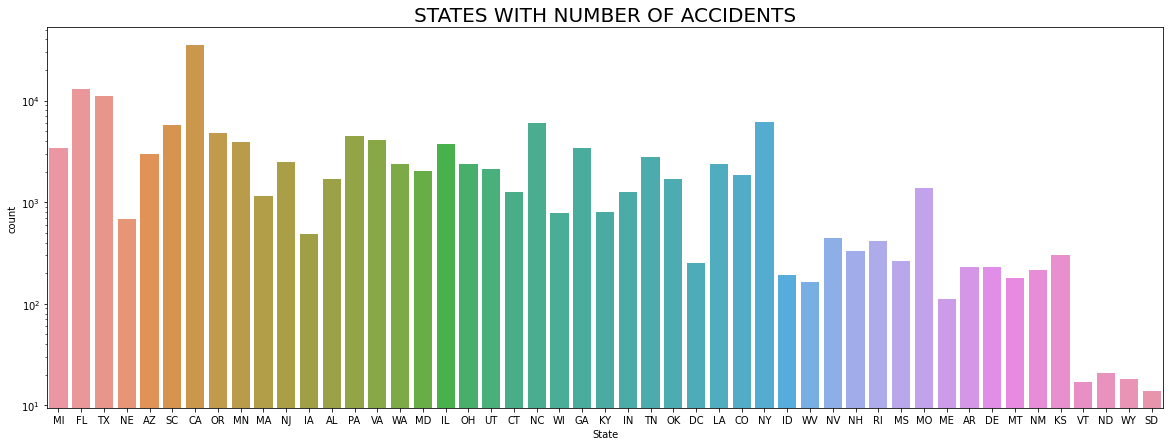

In [83]:
plt.figure(figsize=(20,7))
sns.countplot(x="State",data=df)
plt.yscale("log")
plt.title("STATES WITH NUMBER OF ACCIDENTS",fontsize=20)
plt.show()

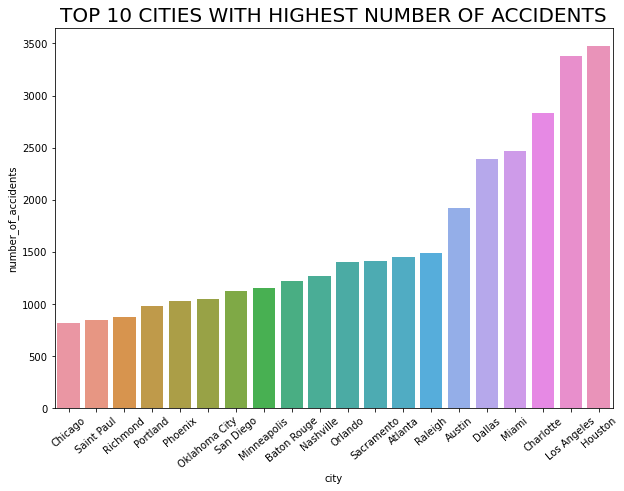

In [84]:
# Top 10 cities with highest number of accidents
top_cities=df["City"].value_counts().sort_values()[-20:].reset_index()
top_cities.columns=["city","number_of_accidents"]

plt.figure(figsize=(10,7))
sns.barplot(x="city",y="number_of_accidents",data=top_cities)
plt.title("TOP 10 CITIES WITH HIGHEST NUMBER OF ACCIDENTS",fontsize=20)
plt.xticks(rotation=40)
plt.show()

### To be continued..